<a href="https://colab.research.google.com/github/chiragpandey37/web-scraping-of-just-watch/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
soup.find_all('div',class_='title-list-grid__item')

[<div class="title-list-grid__item" data-id="1_eyJhZ2VfY2VydGlmaWNhdGlvbnMiOltdLCJjb250ZW50X3R5cGVzIjpbIm1vdmllIl0sInByb3ZpZGVyc190eXBlIjpudWxsLCJleGNsdWRlX3Byb3ZpZGVycyI6W10sImdlbnJlcyI6W10sImV4Y2x1ZGVfZ2VucmVzIjpbXSwibGFuZ3VhZ2VzIjpudWxsLCJtaW5fcHJpY2UiOm51bGwsIm1pbl9ydW50aW1lIjpudWxsLCJtYXRjaGluZ19vZmZlcnNfb25seSI6bnVsbCwibWF4X3ByaWNlIjpudWxsLCJtYXhfcnVudGltZSI6bnVsbCwibW9uZXRpemF0aW9uX3R5cGVzIjpbXSwicHJlc2VudGF0aW9uX3R5cGVzIjpbXSwicHJvdmlkZXJzIjpbXSwicmVsZWFzZV95ZWFyX2Zyb20iOjIwMDAsInJlbGVhc2VfeWVhcl91bnRpbCI6bnVsbCwic2NvcmluZ19maWx0ZXJfdHlwZXMiOm51bGwsInRpbWVsaW5lX3R5cGUiOm51bGwsInNvcnRfYnkiOm51bGwsInNvcnRfYXNjIjpudWxsLCJwcm9kdWN0aW9uX2NvdW50cmllcyI6W10sImV4Y2x1ZGVfcHJvZHVjdGlvbl9jb3VudHJpZXMiOltdLCJpc191cGNvbWluZyI6ZmFsc2UsInN1YmdlbnJlcyI6W119_tm1355222" data-testid="titleItem" data-title="Aavesham" data-v-42a39cb8=""><div data-page="jw_page_anchor" data-page-number="1" data-v-42a39cb8=""></div><a class="title-list-grid__item--link" data-v-42a39cb8="" href="/in/movie/aavesham-202

In [ ]:
#fetch all movies url
Movie_link=soup.find_all('a',class_='title-list-grid__item--link')



In [ ]:
#fetch url of all movies with the help of for loop
URL_in_text=[]
for i in Movie_link:
  link=i.get('href')
  URL_in_text.append(link)
print(URL_in_text)

['/in/movie/aavesham-2024', '/in/movie/the-crew-2024', '/in/movie/godzilla-minus-one', '/in/movie/laapataa-ladies', '/in/movie/manjummel-boys', '/in/movie/godzilla-x-kong-the-new-empire', '/in/movie/munjha', '/in/movie/hit-man', '/in/movie/maidaan', '/in/movie/family-star', '/in/movie/the-fall-guy', '/in/movie/mad-max-fury-road', '/in/movie/dune-part-two', '/in/movie/madgaon-express', '/in/movie/bade-miyan-chote-miyan-2023', '/in/movie/the-gangster-the-cop-the-devil', '/in/movie/premalu', '/in/movie/black-magic-2024', '/in/movie/rockstar', '/in/movie/hereditary', '/in/movie/swatantra-veer-savarkar', '/in/movie/kung-fu-panda-4', '/in/movie/oppenheimer', '/in/movie/the-first-omen', '/in/movie/challengers', '/in/movie/salaar', '/in/movie/12th-fail', '/in/movie/rathnam', '/in/movie/365-days', '/in/movie/hanu-man', '/in/movie/varshangalkku-shesham', '/in/movie/zara-hatke-zara-bach-ke', '/in/movie/inside-out', '/in/movie/animal-2022', '/in/movie/aquaman-and-the-lost-kingdom', '/in/movie/atla

In [ ]:
#make active link with the help of for loop
active_link=[]
for j in URL_in_text:
  final_link="https://www.justwatch.com"+j
  active_link.append(final_link)
print(active_link)
print(len(active_link))


['https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/godzilla-minus-one', 'https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/hit-man', 'https://www.justwatch.com/in/movie/maidaan', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/mad-max-fury-road', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/madgaon-express', 'https://www.justwatch.com/in/movie/bade-miyan-chote-miyan-2023', 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https://www.justwatch.com

## **Scrapping Movie Title**

In [ ]:
#fetch all movie title
titles = soup.find_all('div', class_='title-list-grid__item', attrs={'data-testid': 'titleItem'}) # Use find_all to get all elements
Movies_title=[]
for i in titles:
  if 'data-title' in i.attrs: # Check if 'data-title' attribute exists before accessing
    title = i['data-title']
    Movies_title.append(title)
print(Movies_title)
print(len(Movies_title))



['Aavesham', 'Crew', 'Godzilla Minus One', 'Laapataa Ladies', 'Manjummel Boys', 'Godzilla x Kong: The New Empire', 'Munjya', 'Hit Man', 'Maidaan', 'Family Star', 'The Fall Guy', 'Mad Max: Fury Road', 'Dune: Part Two', 'Madgaon Express', 'Bade Miyan Chote Miyan', 'The Gangster, the Cop, the Devil', 'Premalu', 'Shaitaan', 'Rockstar', 'Hereditary', 'Swatantrya Veer Savarkar', 'Kung Fu Panda 4', 'Oppenheimer', 'The First Omen', 'Challengers', 'Salaar', '12th Fail', 'Rathnam', '365 Days', 'Hanu-Man', 'Varshangalkku Shesham', 'Zara Hatke Zara Bachke', 'Inside Out', 'Animal', 'Aquaman and the Lost Kingdom', 'Atlas', 'Yodha', 'The Goat Life', 'Anyone But You', 'Furiosa: A Mad Max Saga', 'Aranmanai 4', 'Do Aur Do Pyaar', 'Kingdom of the Planet of the Apes', 'Gangs of Godavari', "Harry Potter and the Philosopher's Stone", 'Spider-Man: No Way Home', 'Exhuma', 'Dune', 'Civil War', 'Abigail', 'Teri Baaton Mein Aisa Uljha Jiya', 'Blink', 'Je Jatt Vigarh Gya', 'Oru Nodi', 'Article 370', 'Under Paris'

## **Scrapping release Year**

In [ ]:
import time
movie_year=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    year="NA"
    year= eval(soup.find_all('div',attrs={'data-testid':'titleBlock'})[0].find_all('span')[0].text)
  except Exception as e:
    pass
  movie_year.append(year)
  time.sleep(1)
print(movie_year)
print(len(movie_year))

[2024, 2024, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2015, 2024, 2024, 2024, 2019, 2024, 2024, 2011, 2018, 2024, 2024, 2023, 2024, 2024, 2023, 2023, 2024, 2020, 2024, 2024, 2023, 2015, 2023, 2023, 2024, 2024, 2024, 2023, 2024, 2024, 2024, 2024, 2024, 2001, 2021, 2024, 2021, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 'NA', 2021, 'NA', 2018, 'NA', 'NA', 2023, 'NA', 2011, 2018, 'NA', 'NA', 2022, 2024, 'NA', 2023, 'NA', 2023, 'NA', 'NA', 2024, 'NA', 2019, 'NA', 2011, 'NA', 2024, 'NA', 'NA', 2024, 'NA', 2014, 'NA', 'NA', 2023, 'NA', 2024, 'NA', 2024, 'NA', 2018, 'NA', 'NA']
100


## **Scrapping Genres**

In [ ]:
#Fetch all genres
movie_genre=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for i in soup.find_all('div', class_='detail-infos'):
      if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Genres':
        genre= i.find_all('span', class_='detail-infos__value')[0].text.strip()

  except :
   genre='NA'

  movie_genre.append(genre)
  time.sleep(1)
print(movie_genre)
print(len(movie_genre))





['Action & Adventure, Comedy', 'Comedy, Drama', 'Comedy, Drama', 'Drama, Comedy', 'Drama, Comedy', 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller', 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller', 'Crime, Romance, Comedy', 'Crime, Romance, Comedy', 'Action & Adventure, Drama, Romance, Comedy', 'Action & Adventure, Drama, Romance, Comedy', 'Action & Adventure, Drama, Romance, Comedy', 'Science-Fiction, Action & Adventure, Drama', 'Science-Fiction, Action & Adventure, Drama', 'Mystery & Thriller, Science-Fiction, Action & Adventure, Comedy', 'Mystery & Thriller, Science-Fiction, Action & Adventure, Comedy', 'Comedy, Romance', 'Comedy, Romance', 'Comedy, Romance', 'Mystery & Thriller, Horror, Drama', 'Mystery & Thriller, Horror, Drama', 'Kids & Family, Fantasy, Animation, Action & Adventure, Comedy', 'Kids & Family, Fantasy, Animation, Action & Adventure, Comedy', 'Horror', 'Horror', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Crime, Dram

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
IMDB_rating=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text == 'Rating':
          rating= i.find_all('div', class_='detail-infos__value')[0].text.strip() # Update rating if found
  except Exception as e:
    rating = 'NA'

  IMDB_rating.append(rating)
  time.sleep(1)
print(IMDB_rating)
print(len(IMDB_rating))

['8.0  (11k)', '8.0  (11k)', '7.8  (120k)', '7.8  (120k)', '8.3  (16k)', '8.3  (16k)', '7.7  (12k)', '7.0  (43k)', '7.0  (43k)', '5.1  (3k)', '5.1  (3k)', '8.1  (1m)', '8.1  (1m)', '7.1  (35k)', '7.1  (35k)', '7.1  (35k)', '7.9  (12k)', '7.9  (12k)', '7.7  (49k)', '7.7  (49k)', '7.7  (49k)', '6.3  (43k)', '6.3  (43k)', '6.5  (35k)', '6.5  (35k)', '6.5  (65k)', '6.5  (65k)', '6.5  (65k)', '3.3  (99k)', '3.3  (99k)', '6.9  (2k)', '6.9  (2k)', '8.1  (795k)', '8.1  (795k)', '5.6  (88k)', '5.6  (88k)', '5.6  (88k)', '8.6  (7k)', '8.6  (7k)', '7.8  (85k)', '7.8  (85k)', '6.3  (5k)', '6.3  (5k)', '5.1', '5.1', '8.2  (888k)', '6.9  (10k)', '6.9  (10k)', '6.9  (10k)', '6.6  (44k)', '6.6  (44k)', '7.9', '7.9', '6.9', '7.9  (20k)', '7.9  (20k)', '7.9  (20k)', '7.8  (1k)', '7.8  (1k)', '7.8  (1k)', '7.8  (1k)', '7.8  (1k)', '8.7  (40k)', '8.7  (40k)', '3.9  (66k)', '3.9  (66k)', '8.2  (99k)', '8.2  (99k)', '6.9  (44k)', '6.9  (44k)', '8.4  (2k)', '8.4  (2k)', '7.7  (16k)', '6.2  (25k)', '6.2  (25k

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
Runtimes=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Runtime':
          runtime= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    runtime='NA'

  Runtimes.append(runtime)
  time.sleep(1)
print(Runtimes)
print(len(Runtimes))

['2h 38min', '1h 58min', '2h 5min', '2h 2min', '2h 15min', '1h 55min', '2h 20min', '1h 56min', '3h 1min', '2h 39min', '2h 6min', '2h 0min', '2h 47min', '2h 23min', '2h 44min', '1h 50min', '2h 36min', '2h 12min', '2h 39min', '2h 7min', '2h 56min', '1h 34min', '1h 34min', '1h 59min', '1h 59min', '2h 55min', '2h 55min', '2h 39min', '2h 39min', '2h 39min', '2h 39min', '2h 39min', '1h 35min', '1h 35min', '2h 4min', '2h 4min', '2h 10min', '2h 10min', '1h 44min', '1h 44min', '2h 28min', '2h 28min', '2h 25min', '2h 25min', '2h 32min', '2h 28min', '2h 28min', '2h 35min', '2h 35min', '1h 49min', '1h 49min', '2h 16min', '2h 16min', '2h 8min', '2h 8min', '1h 44min', '1h 44min', '2h 28min', '2h 28min', '2h 28min', '1h 53min', '1h 53min', '1h 53min', '2h 13min', '2h 13min', '1h 45min', '1h 45min', '2h 19min', '2h 19min', '2h 19min', '2h 2min', '2h 2min', '2h 30min', '2h 30min', '2h 23min', '2h 32min', '2h 32min', '2h 32min', '3h 0min', '3h 0min', '2h 47min', '1h 46min', '1h 46min', '1h 46min', '2h 6

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
Age_rating=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    age_rating = 'NA'
    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Age rating':
          age_rating= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    pass

  Age_rating.append(age_rating)
  time.sleep(1)
print(Age_rating)
print(len(Age_rating))

['NA', 'UA', 'NA', 'UA', 'UA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'A', 'NA', 'UA', 'UA', 'NA', 'U', 'NA', 'UA', 'NA', 'NA', 'U', 'NA', 'NA', 'A', 'A', 'NA', 'NA', 'NA', 'UA', 'NA', 'UA', 'NA', 'A', 'NA', 'NA', 'UA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'A', 'NA', 'NA', 'UA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'UA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA']
100


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
Production_countries=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text==' Production country ':
          country= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    country = 'NA' # Assign 'NA' to country in case of an exception

  Production_countries.append(country)
  time.sleep(1)
print(Production_countries)
print(len(Production_countries))

['India', 'India', 'Japan', 'India', 'India', 'United States, Australia', 'India', 'United States', 'United States', 'India', 'India', 'Australia, United States', 'Australia, United States', 'Australia, United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States, United Kingdom', 'United States, United Kingdom', 'United States, United Kingdom', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'United Kingdom, United States', 'United Kingdom, United States', 'India', 'India'

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
Streaming_services=[]
for url in active_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    stream_provider=soup.find('div', class_='buybox-row__offers').find_all('img',class_='offer__icon')
    alt_value=[img['alt'] for img in stream_provider]
    alt_value=(",".join(alt_value))

  except AttributeError as err:
    alt_value='NA'

  Streaming_services.append(alt_value)
  time.sleep(1)
print(Streaming_services)
print(len(Streaming_services))

['Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'Hotstar', 'NA', 'Bookmyshow', 'NA', 'Amazon Prime Video', 'NA', 'Apple TV', 'Amazon Prime Video', 'Apple TV', 'NA', 'NA', 'Lionsgate Play', 'NA', 'Netflix', 'NA', 'Amazon Prime Video', 'Zee5', 'NA', 'Apple TV', 'NA', 'Apple TV', 'NA', 'Hotstar', 'NA', 'Netflix', 'NA', 'Sony Liv', 'NA', 'Apple TV', 'NA', 'NA', 'Netflix', 'NA', 'NA', 'NA', 'Bookmyshow', 'NA', 'NA', 'Bookmyshow', 'NA', 'Apple TV', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'Amazon Prime Video', 'NA', 'Netflix', 'NA', 'aha', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'Apple TV', 'NA', 'NA', 'Sony Liv', 'NA', 'Hotstar', 'NA', 'Bookmyshow', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'Lionsgate Play,Lionsgate Play Apple TV Channel,Lionsgate Play Amazon Channel', 'NA', 'Hotstar', 'NA', 'Apple TV', 'NA', 'Jio Cinema,Zee5,Eros Now', 'NA', 'NA', 'NA', 'NA', 'Bookmyshow', 'NA', 'Apple TV Plus', 'Amazon Prime Video', 'NA'

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
#creating dataframe of movie url, movie title,release year,imdb rating,movie runtime, age rating,production country,streaming service provider
info={
    'Movie_url':active_link,
    'Movie_title':Movies_title,
    'Release_year':movie_year,
    'Genre':movie_genre,
    'IMDB_rating':IMDB_rating,
    'Runtime':Runtimes,
    'Age_rating':Age_rating,
    'Production_country':Production_countries,
    'Streaming_services':Streaming_services
}
df=pd.DataFrame(info)
df

,Movie_url,Movie_title,Release_year,Genre,IMDB_rating,Runtime,Age_rating,Production_country,Streaming_services
0,https://www.justwatch.com/in/movie/aavesham-2024,Aavesham,2024,"Action & Adventure, Comedy",8.0 (11k),2h 38min,NA,India,Amazon Prime Video
1,https://www.justwatch.com/in/movie/the-crew-2024,Crew,2024,"Comedy, Drama",8.0 (11k),1h 58min,UA,India,Netflix
2,https://www.justwatch.com/in/movie/godzilla-mi...,Godzilla Minus One,2023,"Comedy, Drama",7.8 (120k),2h 5min,NA,Japan,Netflix
3,https://www.justwatch.com/in/movie/laapataa-la...,Laapataa Ladies,2024,"Drama, Comedy",7.8 (120k),2h 2min,UA,India,Netflix
4,https://www.justwatch.com/in/movie/manjummel-boys,Manjummel Boys,2024,"Drama, Comedy",8.3 (16k),2h 15min,UA,India,Hotstar
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/late-night-...,Late Night with the Devil,2024,"Drama, Mystery & Thriller",7.5 (264k),1h 33min,NA,"Australia, United Arab Emirates, United States",NA
96,https://www.justwatch.com/in/movie/kurangu-pedal,Kurangu Pedal,NA,"Drama, Mystery & Thriller",7.5 (264k),1h 33min,NA,"Australia, United Arab Emirates, United States",NA
97,https://www.justwatch.com/in/movie/stree,Stree,2018,"Horror, Comedy, Drama",7.5 (38k),2h 8min,UA,"Australia, United Arab Emirates, United States",Apple TV
98,https://www.justwatch.com/in/movie/maharshi,Maharshi,NA,"Horror, Comedy, Drama",7.2 (9k),2h 8min,NA,India,NA


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
soup.find_all('div',class_='title-list-grid__item')

[<div class="title-list-grid__item" data-id="1_eyJhZ2VfY2VydGlmaWNhdGlvbnMiOltdLCJjb250ZW50X3R5cGVzIjpbInNob3ciXSwicHJvdmlkZXJzX3R5cGUiOm51bGwsImV4Y2x1ZGVfcHJvdmlkZXJzIjpbXSwiZ2VucmVzIjpbXSwiZXhjbHVkZV9nZW5yZXMiOltdLCJsYW5ndWFnZXMiOm51bGwsIm1pbl9wcmljZSI6bnVsbCwibWluX3J1bnRpbWUiOm51bGwsIm1hdGNoaW5nX29mZmVyc19vbmx5IjpudWxsLCJtYXhfcHJpY2UiOm51bGwsIm1heF9ydW50aW1lIjpudWxsLCJtb25ldGl6YXRpb25fdHlwZXMiOltdLCJwcmVzZW50YXRpb25fdHlwZXMiOltdLCJwcm92aWRlcnMiOltdLCJyZWxlYXNlX3llYXJfZnJvbSI6MjAwMCwicmVsZWFzZV95ZWFyX3VudGlsIjpudWxsLCJzY29yaW5nX2ZpbHRlcl90eXBlcyI6bnVsbCwidGltZWxpbmVfdHlwZSI6bnVsbCwic29ydF9ieSI6bnVsbCwic29ydF9hc2MiOm51bGwsInByb2R1Y3Rpb25fY291bnRyaWVzIjpbXSwiZXhjbHVkZV9wcm9kdWN0aW9uX2NvdW50cmllcyI6W10sImlzX3VwY29taW5nIjpmYWxzZSwic3ViZ2VucmVzIjpbXX0=_ts237536" data-testid="titleItem" data-title="Panchayat" data-v-42a39cb8=""><div data-page="jw_page_anchor" data-page-number="1" data-v-42a39cb8=""></div><a class="title-list-grid__item--link" data-v-42a39cb8="" href="/in/tv-show/panchayat"

In [ ]:
# Write Your Code here
TV_show_link=soup.find_all('a',class_='title-list-grid__item--link')

In [ ]:
URL_intext=[]
for i in TV_show_link:
  link=i.get('href')
  URL_intext.append(link)
print(URL_intext)

['/in/tv-show/panchayat', '/in/tv-show/gullak', '/in/tv-show/mirzapur', '/in/tv-show/heeramandi', '/in/tv-show/house-of-the-dragon', '/in/tv-show/bridgerton', '/in/tv-show/shogun-2024', '/in/tv-show/raising-voices', '/in/tv-show/the-boys', '/in/tv-show/game-of-thrones', '/in/tv-show/fallout', '/in/tv-show/demon-slayer-kimetsu-no-yaiba', '/in/tv-show/apharan', '/in/tv-show/eric', '/in/tv-show/3-body-problem', '/in/tv-show/sunflower-2021', '/in/tv-show/murder-in-mahim', '/in/tv-show/dark-matter-2024', '/in/tv-show/maxton-hall-the-world-between-us', '/in/tv-show/aashram', '/in/tv-show/kota-factory', '/in/tv-show/farzi', '/in/tv-show/the-good-doctor', '/in/tv-show/attack-on-titan', '/in/tv-show/the-8-show', '/in/tv-show/jurassic-world-chaos-theory', '/in/tv-show/the-family-man', '/in/tv-show/young-sheldon', '/in/tv-show/untitled-kapil-sharma-netflix-project', '/in/tv-show/from', '/in/tv-show/jujutsu-kaisen', '/in/tv-show/the-legend-of-hanuman', '/in/tv-show/the-acolyte', '/in/tv-show/mtv-s

In [ ]:
TV_link=[]
for j in URL_intext:
  final_link="https://www.justwatch.com"+j
  TV_link.append(final_link)
print(TV_link)
print(len(TV_link))

['https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/gullak', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/bridgerton', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/raising-voices', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/eric', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/murder-in-mahim', 'https://www.justwatch.com/in/tv-show/dark-matter-2024', 'https://www.justwatch.com/in/tv-show/maxton-

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
titles = soup.find_all('div', class_='title-list-grid__item', attrs={'data-testid': 'titleItem'}) # Use find_all to get all elements
tv_show_title=[]
for i in titles:
  if 'data-title' in i.attrs: # Check if 'data-title' attribute exists before accessing
    title = i['data-title']
    tv_show_title.append(title)
print(tv_show_title)
print(len(tv_show_title))

['Panchayat', 'Gullak', 'Mirzapur', 'Heeramandi: The Diamond Bazaar', 'House of the Dragon', 'Bridgerton', 'Shōgun', 'Raising Voices', 'The Boys', 'Game of Thrones', 'Fallout', 'Demon Slayer: Kimetsu no Yaiba', 'Apharan', 'Eric', '3 Body Problem', 'Sunflower', 'Murder in Mahim', 'Dark Matter', 'Maxton Hall: The World Between Us', 'Aashram', 'Kota Factory', 'Farzi', 'The Good Doctor', 'Attack on Titan', 'The 8 Show', 'Jurassic World: Chaos Theory', 'The Family Man', 'Young Sheldon', 'The Great Indian Kapil Show', 'From', 'Jujutsu Kaisen', 'The Legend of Hanuman', 'The Acolyte', 'MTV Splitsvilla', 'Reacher', 'Asur: Welcome to Your Dark Side', 'Peaky Blinders', 'Dehati Ladke', 'True Detective', 'Jamnapaar', 'Mastram', 'Breaking Bad', 'Money Heist', 'The Last of Us', 'Stranger Things', 'Naruto', 'Presumed Innocent', 'Scorpion', 'Euphoria', 'Dark', 'Lucifer', 'Undekhi', 'Naruto Shippūden', 'The Rookie', 'Gandii Baat', 'Resident Alien', 'Mayfair Witches', 'Paurashpur', 'Luther', 'Lost', 'Col

## **Fetching Release Year**

In [ ]:
import time
tv_show_year=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    year= eval(soup.find_all('div',attrs={'data-testid':'titleBlock'})[0].find_all('span')[0].text)
  except Exception as e:
    year='NA'
  tv_show_year.append(year)
  time.sleep(1)
print(tv_show_year)
print(len(tv_show_year))

[2020, 2019, 2018, 2024, 2022, 2020, 2024, 2024, 2019, 2011, 2024, 2019, 2018, 2024, 2024, 2021, 2024, 2024, 2024, 2020, 2019, 2023, 2017, 2013, 2024, 2024, 2019, 2017, 2024, 2022, 2020, 2021, 2024, 2008, 2022, 2020, 2013, 2023, 2014, 2024, 2020, 2008, 2017, 2023, 2016, 2002, 2024, 2014, 2019, 2017, 2016, 2020, 2007, 2018, 2018, 2021, 2023, 2020, 2010, 2004, 2018, 2024, 2024, 2020, 2020, 2020, 2022, 2005, 2021, 2018, 2009, 2020, 'NA', 2024, 2011, 2017, 'NA', 2024, 'NA', 2023, 'NA', 'NA', 2005, 2024, 'NA', 'NA', 2021, 2013, 'NA', 2024, 'NA', 2024, 2024, 'NA', 2021, 2009, 'NA', 2024, 2018, 'NA']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tv_show_genre=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all('div', class_='detail-infos'):
      if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Genres':
        genre= i.find_all('span', class_='detail-infos__value')[0].text.strip()

  except Exception as e:
    genre='NA'

  tv_show_genre.append(genre)
  time.sleep(1)
print(tv_show_genre)
print(len(tv_show_genre))


['Comedy, Drama', 'Comedy, Drama, Kids & Family', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Romance, Drama, History, War & Military', 'Romance, Action & Adventure, Drama, Fantasy, Science-Fiction', 'Drama, Romance', 'War & Military, Drama, History', 'Drama', 'Action & Adventure, Comedy, Crime, Drama, Science-Fiction', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller', 'Science-Fiction, Drama, Fantasy', 'Comedy, Crime', 'Crime', 'Mystery & Thriller, Drama, Science-Fiction', 'Drama, Romance', 'Crime, Drama, Mystery & Thriller', 'Comedy, Drama', 'Crime, Drama, Mystery & Thriller', 'Drama', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Drama, Mystery & Thriller, Comedy', 'Science-Fiction, Animation, Action & Ad

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
TV_IMDB_rating=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')


    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text == 'Rating':
          rating= i.find_all('div', class_='detail-infos__value')[0].text.strip() # Update rating if found
  except Exception as e:
     rating='NA'

  TV_IMDB_rating.append(rating)
  time.sleep(1)
print(TV_IMDB_rating)
print(len(TV_IMDB_rating))

['9.0  (93k)', '9.1  (23k)', '8.5  (82k)', '6.4  (26k)', '8.4  (390k)', '7.4  (182k)', '8.7  (143k)', '7.2  (2k)', '8.7  (670k)', '9.2  (2m)', '8.4  (209k)', '8.6  (152k)', '8.2  (19k)', '7.0  (21k)', '7.0  (21k)', '7.4  (24k)', '8.1  (29k)', '8.1  (29k)', '7.6  (9k)', '7.6  (9k)', '9.0  (81k)', '9.0  (81k)', '8.0  (115k)', '9.0  (325k)', '9.0  (325k)', '7.6  (1k)', '7.6  (1k)', '7.7  (110k)', '6.7  (25k)', '6.7  (25k)', '6.7  (25k)', '9.1  (12k)', '3.4  (57k)', '3.4  (57k)', '8.1  (216k)', '8.5  (65k)', '8.5  (65k)', '7.2', '7.2', '8.3  (2k)', '8.3  (2k)', '9.5  (2m)', '9.5  (2m)', '9.5  (2m)', '8.7  (1m)', '8.4  (129k)', '7.6  (2k)', '7.6  (2k)', '8.3  (246k)', '8.3  (246k)', '8.1  (358k)', '8.1  (358k)', '8.1  (358k)', '8.0  (75k)', '8.0  (75k)', '8.1  (63k)', '8.1  (63k)', '3.7  (18k)', '3.7  (18k)', '8.3  (599k)', '8.3  (599k)', '8.4  (3k)', '6.6', '6.9  (24k)', '6.9  (24k)', '6.9  (24k)', '7.2  (23k)', '8.6  (248k)', '8.6  (248k)', '8.7  (225k)', '8.7  (225k)', '8.1  (65k)', '8.1

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
TV_show_Age_rating=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    age_rating = 'NA'
    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Age rating':
          age_rating= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    pass

  TV_show_Age_rating.append(age_rating)
  time.sleep(1)
print(TV_show_Age_rating)
print(len(TV_show_Age_rating))

['NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'A', 'NA', 'A', 'NA', 'U', 'NA', 'NA', 'U', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'U', 'NA', 'U', 'NA', 'A', 'NA', 'NA', 'A', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'NA']
100


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
TV_show_Production_countries=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text==' Production country ':
          country= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    country = 'NA' # Assign 'NA' to country in case of an exception

  TV_show_Production_countries.append(country)
  time.sleep(1)
print(TV_show_Production_countries)
print(len(TV_show_Production_countries))

['India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'Spain', 'United States', 'United States, United Kingdom', 'United States', 'Japan', 'India', 'United States, United Kingdom', 'United States', 'India', 'India', 'United States', 'Germany', 'India', 'India', 'India', 'United States', 'Japan', 'South Korea', 'United States', 'India', 'United States', 'India', 'United States', 'Japan, United States', 'India', 'United States', 'India', 'United States', 'India', 'United Kingdom', 'India', 'United States', 'India', 'India', 'United States', 'Spain', 'United States', 'United States', 'Japan', 'United States', 'United States', 'United States', 'Germany', 'United States', 'India', 'Japan', 'United States', 'India', 'United States', 'United States', 'India', 'United Kingdom', 'United States', 'India', 'Japan', 'Indonesia', 'India', 'India', 'Mexico', 'United States', 'United Kingdom', 'United States', 'United States', 'United States', 'India', 'United States

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tv_show_Streaming_services=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    stream_provider=soup.find('div', class_='buybox-row__offers').find_all('img',class_='offer__icon')
    alt_value=[img['alt'] for img in stream_provider]
    alt_value=(",".join(alt_value))

  except AttributeError as err:
    alt_value='NA'

  tv_show_Streaming_services.append(alt_value)
  time.sleep(1)
print(tv_show_Streaming_services)
print(len(tv_show_Streaming_services))


['Amazon Prime Video', 'Sony Liv', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Netflix', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Crunchyroll', 'Jio Cinema,Alt Balaji', 'Netflix', 'Netflix', 'Zee5,VI movies and tv', 'Jio Cinema', 'Apple TV Plus', 'Amazon Prime Video', 'MX Player', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'NA', 'Crunchyroll', 'Hotstar', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon miniTV', 'Jio Cinema', 'Amazon miniTV', 'NA', 'Netflix', 'Netflix', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Apple TV Plus', 'NA', 'Jio Cinema', 'Netflix', 'Netflix', 'Sony Liv', 'Crunchyroll', 'NA', 'Alt Balaji', 'Jio Cinema,Netflix', 'Amazon Prime Video', 'Alt Balaji', 'Amazon Prime Video', 'NA', 'Sony Liv', 'Crunchyroll', 'Netflix', 'Jio Cinema', 'Sony Liv', 'Netflix', 'Amazon Prime Video', 'Ama

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Duration=[]
for url in TV_link:
  try:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all('div', class_='detail-infos'):
        if i.find_all('h3',class_='detail-infos__subheading')[0].text=='Runtime':
          runtime= i.find_all('div', class_='detail-infos__value')[0].text.strip()
  except Exception as e:
    runtime='NA'

  Duration.append(runtime)
  time.sleep(1)
print(Duration)
print(len(Duration))

['35min', '30min', '50min', '54min', '58min', '1h 2min', '59min', '46min', '1h 1min', '58min', '59min', '25min', '24min', '53min', '56min', '38min', '43min', '52min', '45min', '43min', '43min', '56min', '43min', '25min', '52min', '24min', '45min', '19min', '54min', '50min', '24min', '21min', '41min', '44min', '48min', '47min', '58min', '24min', '1h 1min', '32min', '28min', '47min', '50min', '58min', '1h 1min', '23min', '42min', '42min', '58min', '56min', '47min', '35min', '24min', '43min', '44min', '44min', '43min', '25min', '58min', '43min', '31min', '24min', '52min', '31min', '52min', '34min', '49min', '50min', '48min', '50min', '21min', '43min', '43min', '1h 28min', '1h 28min', '51min', '51min', '41min', '41min', '41min', '34min', '34min', '24min', '24min', '40min', '40min', '40min', '43min', '22min', '22min', '44min', '44min', '40min', '40min', '40min', '42min', '42min', '30min', '30min', '24min']
100


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tvinfo={
    'TV_show_url':TV_link,
    'TV_show_title':tv_show_title,
    'Release_year':tv_show_year,
    'Genre':tv_show_genre,
    'IMDB_rating':TV_IMDB_rating,
    'Runtime':Duration,
    'Age_rating':TV_show_Age_rating,
'Production_country':TV_show_Production_countries,
    'Streaming_services':tv_show_Streaming_services,
    'TV_show_duration':Duration
}

df1=pd.DataFrame(tvinfo)
df1


,TV_show_url,TV_show_title,Release_year,Genre,IMDB_rating,Runtime,Age_rating,Production_country,Streaming_services,TV_show_duration
0,https://www.justwatch.com/in/tv-show/panchayat,Panchayat,2020,"Comedy, Drama",9.0 (93k),35min,NA,India,Amazon Prime Video,35min
1,https://www.justwatch.com/in/tv-show/gullak,Gullak,2019,"Comedy, Drama, Kids & Family",9.1 (23k),30min,NA,India,Sony Liv,30min
2,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (82k),50min,NA,India,Amazon Prime Video,50min
3,https://www.justwatch.com/in/tv-show/heeramandi,Heeramandi: The Diamond Bazaar,2024,"Romance, Drama, History, War & Military",6.4 (26k),54min,NA,India,Netflix,54min
4,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon,2022,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4 (390k),58min,A,United States,Jio Cinema,58min
5,https://www.justwatch.com/in/tv-show/bridgerton,Bridgerton,2020,"Drama, Romance",7.4 (182k),1h 2min,NA,United States,Netflix,1h 2min
6,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun,2024,"War & Military, Drama, History",8.7 (143k),59min,NA,United States,Hotstar,59min
7,https://www.justwatch.com/in/tv-show/raising-v...,Raising Voices,2024,Drama,7.2 (2k),46min,NA,Spain,Netflix,46min
8,https://www.justwatch.com/in/tv-show/the-boys,The Boys,2019,"Action & Adventure, Comedy, Crime, Drama, Scie...",8.7 (670k),1h 1min,NA,United States,Amazon Prime Video,1h 1min
9,https://www.justwatch.com/in/tv-show/game-of-t...,Game of Thrones,2011,"Action & Adventure, Drama, Fantasy, Science-Fi...",9.2 (2m),58min,A,"United States, United Kingdom",Jio Cinema,58min


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
#data filtering
#fetch movies title which release in 2023


movie_name=df[df['Release_year']==2023].reset_index()
movie_name['Movie_title']






0               Godzilla Minus One
1                      Oppenheimer
2                           Salaar
3                        12th Fail
4           Zara Hatke Zara Bachke
5                           Animal
6     Aquaman and the Lost Kingdom
7                   Anyone But You
8                         Ganapath
9                      Sam Bahadur
10                         Dhoomam
11                 The Family Plan
Name: Movie_title, dtype: object

In [ ]:
#fetch name of tv shows which release in 2022
tv_name=df1[df1['Release_year']==2022].reset_index()
tv_name['TV_show_title']

0           House of the Dragon
1                          From
2                       Reacher
3    Interview with the Vampire
Name: TV_show_title, dtype: object

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
# find mean of imdb rating of movies
# Extract numeric ratings and convert to float
df['IMDB_rating'] = df['IMDB_rating'].str.extract('(\d+\.\d+)').astype(float)
imdb_mean_movie = df['IMDB_rating'].mean()
print(imdb_mean_movie)

# find mean of imdb rating of tv shows
# Extract numeric ratings and convert to float
df1['IMDB_rating'] = df1['IMDB_rating'].str.extract('(\d+\.\d+)').astype(float)
imdb_mean_tv = df1['IMDB_rating'].mean()
print(imdb_mean_tv)

7.149000000000001
7.761


## **Analyzing Top Genres**

In [ ]:
#analyzing top genres

# Top genres for movies
movie_genres = df['Genre'].str.split(', ')
movie_genre_counts = {}
for genres in movie_genres:
    for genre in genres:
        movie_genre_counts[genre] = movie_genre_counts.get(genre, 0) + 1

top_movie_genres = sorted(movie_genre_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Top genres for TV shows
tv_genres = df1['Genre'].str.split(', ')
tv_genre_counts = {}
for genres in tv_genres:
    for genre in genres:
        tv_genre_counts[genre] = tv_genre_counts.get(genre, 0) + 1

top_tv_genres = sorted(tv_genre_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print results
print("Top Movie Genres:")
for genre, count in top_movie_genres:
    print(f"- {genre}: {count}")

print("\nTop TV Show Genres:")
for genre, count in top_tv_genres:
    print(f"- {genre}: {count}")


Top Movie Genres:
- Drama: 67
- Action & Adventure: 43
- Mystery & Thriller: 43
- Comedy: 35
- Romance: 31

Top TV Show Genres:
- Drama: 82
- Comedy: 34
- Science-Fiction: 32
- Action & Adventure: 27
- Mystery & Thriller: 27


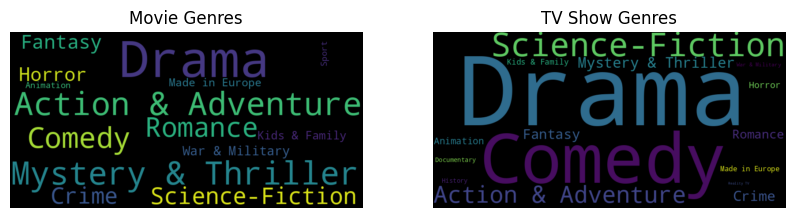

In [ ]:
#Let's Visvalize it using word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for movie and TV show genres
movie_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(movie_genre_counts)
tv_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tv_genre_counts)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(movie_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres")

plt.subplot(1, 2, 2)
plt.imshow(tv_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Show Genres")

plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
#finding most popular streaming service except NA of movies and tv show

# Find most popular streaming service for movies, excluding "NA"
movie_streaming_services = df['Streaming_services'].str.split(', ')
movie_streaming_counts = {}
for services in movie_streaming_services:
    for service in services:
        if service != 'NA':
            movie_streaming_counts[service] = movie_streaming_counts.get(service, 0) + 1

most_popular_movie_streaming = sorted(movie_streaming_counts.items(), key=lambda x: x[1], reverse=True)[:5]

tv_streaming_services = df1['Streaming_services'].str.split(', ')
tv_streaming_counts = {}
for services in tv_streaming_services:
    if isinstance(services, float):  # Check if services is a float (NaN)
        continue  # Skip to the next iteration if it is
    for service in services:
        if service != 'NA':
            tv_streaming_counts[service] = tv_streaming_counts.get(service, 0) + 1

most_popular_tv_streaming = sorted(tv_streaming_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print results
print("Most Popular Movie Streaming Service:", most_popular_movie_streaming)
print("Most Popular TV Show Streaming Service:", most_popular_tv_streaming)


Most Popular Movie Streaming Service: [('Amazon Prime Video', 11), ('Apple TV', 9), ('Netflix', 8), ('Bookmyshow', 5), ('Hotstar', 4)]
Most Popular TV Show Streaming Service: [('Netflix', 24), ('Amazon Prime Video', 23), ('Jio Cinema', 9), ('Hotstar', 8), ('Sony Liv', 4)]


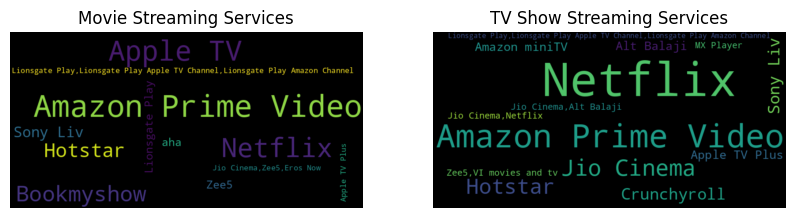

In [ ]:
#Let's Visvalize it using word cloud

import matplotlib.pyplot as plt
# Generate word clouds for movie and TV show streaming services
movie_streaming_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(movie_streaming_counts)
tv_streaming_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tv_streaming_counts)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(movie_streaming_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Streaming Services")

plt.subplot(1, 2, 2)
plt.imshow(tv_streaming_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Show Streaming Services")

plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df.to_csv('Final_Data.csv')
df1.to_csv('Final_Data_TV_Shows.csv')

In [ ]:
#saving filter data as Filter Data in csv format
movie_name.to_csv('Filtered_Data_Movies.csv')
tv_name.to_csv('Filtered_Data_TV_Shows.csv')

# **Dataset Drive Link (View Access with Anyone) -**
Final_Data_TV_Shows= https://drive.google.com/file/d/1k1rCAyrtLuo7xYbf13epBE-AgjSNzk21/view?usp=sharing

Filtered_Data_Movies = https://drive.google.com/file/d/1RbOYww4CEUvylsWKdgR8Jzu2Ra6Ku6aW/view?usp=sharing

Filtered_Data_TV_Shows = https://drive.google.com/file/d/1ChfCLwc5NVwXnYr3eXHpWsvtDZmGF0PI/view?usp=sharing

Final_Movies_Data=https://drive.google.com/file/d/1Cyy2op_6IIHHNLbEzGojgpvkFpypx8Sc/view?usp=sharing

#**Github Link:**

# ***Congratulations!!! You have completed your Assignment.***